In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-data/ifood_df.csv
/kaggle/input/marketing-data/dictionary.png


In [2]:
food = pd.read_csv('/kaggle/input/marketing-data/ifood_df.csv')

In [3]:
print(f'The shape of the dataset: {food.shape}\n')
print(f'The names of the columns in the dataset: {food.columns}\n')
print(f'Are the any missing values in the Data set: {food.isnull().values.any()}\n')
print(f'Are the any duiplcates in the Data set: {food.duplicated().values.any()}\n')


The shape of the dataset: (2205, 39)

The names of the columns in the dataset: Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

Are the any missing values in the Data set: False

Are the any duiplcates in the Data set: True



In [4]:
food[food.duplicated()]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
77,38620.0,0,0,56,112,17,44,34,22,89,...,1,0,0,0,0,1,0,229,140,0
167,78497.0,0,0,44,207,26,447,75,0,223,...,0,0,1,0,0,0,0,755,532,1
267,51369.0,0,1,84,297,7,79,0,11,182,...,1,0,0,0,1,0,0,394,212,0
268,37760.0,0,0,20,84,5,38,150,12,28,...,1,0,0,0,1,0,0,289,261,0
346,37717.0,1,0,31,9,0,6,4,1,5,...,0,0,0,0,0,0,1,20,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,22775.0,1,0,40,5,1,8,0,0,1,...,1,0,0,0,1,0,0,14,13,0
2188,75777.0,0,0,12,712,26,538,69,13,80,...,0,0,0,0,0,1,0,1358,1278,2
2192,58554.0,1,1,55,368,24,68,38,0,88,...,1,0,0,0,1,0,0,498,410,0
2199,34421.0,1,0,81,3,3,7,6,2,9,...,0,0,0,0,1,0,0,21,12,0


In [5]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [6]:
food.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [7]:
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Household Income')

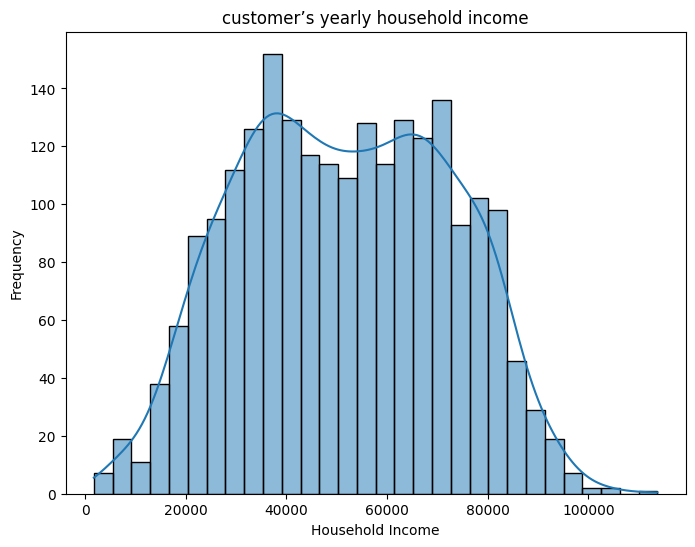

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(data=food, x='Income', bins=30, kde=True)
plt.title('customer’s yearly household income')
plt.ylabel('Frequency')
plt.xlabel('Household Income')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Age of customer')

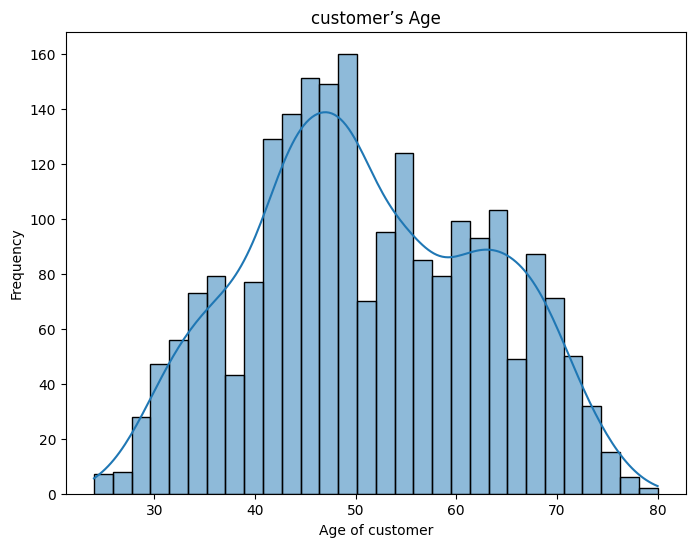

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(data=food, x='Age', bins=30, kde=True)
plt.title('customer’s Age')
plt.ylabel('Frequency')
plt.xlabel('Age of customer')

**Feature Engineering**

In [10]:
food['Frequency'] = food[food.columns[15:20]].sum(axis=1)

# # **RFM ANALYSIS**

In [11]:
rfm = food[['Recency', 'Frequency', 'MntTotal']]
rfm.sample(5)

,Recency,Frequency,MntTotal
1601,35,0,1051
1554,81,0,483
1037,32,0,253
2012,97,0,67
425,14,0,13


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib  import pyplot as plt

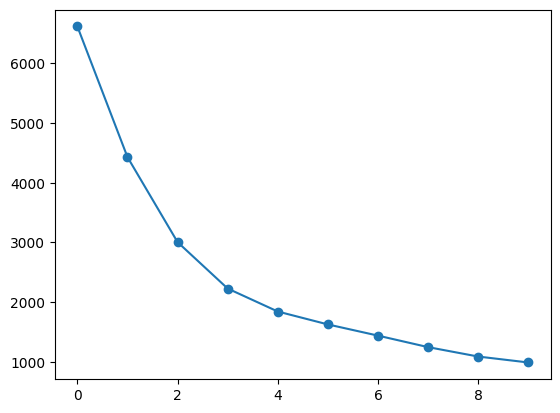

In [13]:
scaler = StandardScaler()
scaled = scaler.fit_transform(rfm)

inertia = []
for i in np.arange(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    inertia.append(kmeans.fit(scaled).inertia_)

plt.plot(inertia, marker='o')

In [14]:
kmeans = KMeans(n_clusters=3, n_init=10)
rfm['Clusters'] = kmeans.fit(scaled).labels_
rfm.sample(5)

/tmp/ipykernel_18/185487261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Clusters'] = kmeans.fit(scaled).labels_


,Recency,Frequency,MntTotal,Clusters
751,57,0,1302,0
144,10,2,1339,1
1069,0,0,1149,2
1241,98,1,1728,1
559,10,0,152,2


In [15]:
rfm.groupby('Clusters').mean()

,Recency,Frequency,MntTotal
Clusters,,,
0,73.761468,0.090724,467.464832
1,47.936396,1.703180,1449.720848
2,23.527099,0.094580,395.368757


In [16]:
conditions = []
for i in rfm.Clusters:
    if i == 2:
        conditions.append('Average')
    elif i == 1:
        conditions.append('Whale')
    else:
        conditions.append('Lapsed')
rfm['Conditions'] = conditions
rfm.sample(10)

/tmp/ipykernel_18/1430452335.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm['Conditions'] = conditions


,Recency,Frequency,MntTotal,Clusters,Conditions
2034,54,0,1114,0,Lapsed
530,72,0,124,0,Lapsed
980,38,2,490,1,Whale
1487,92,0,1551,0,Lapsed
673,29,0,19,2,Average
1339,55,0,498,0,Lapsed
1699,10,0,62,2,Average
628,36,2,1517,1,Whale
2031,10,0,901,2,Average
1925,19,0,512,2,Average


<Axes: ylabel='Conditions'>

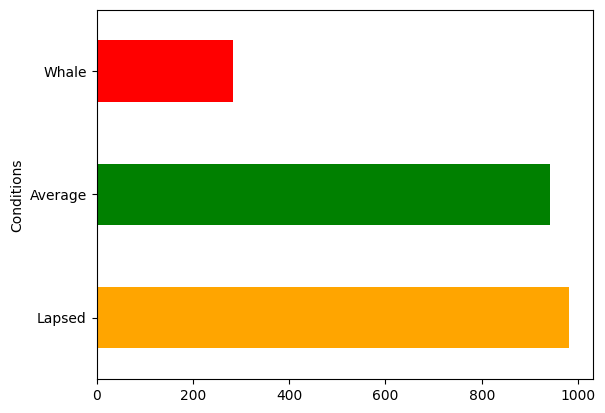

In [17]:
result = rfm.Conditions.value_counts()
result.plot(kind='barh', color=['orange', 'green', 'red'])

In [18]:
food['Conditions'] = rfm.Conditions
food.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Frequency,Conditions
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,1,0,0,1529,1441,0,0,Lapsed
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,1,0,0,21,15,0,0,Average
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,1,0,0,734,692,0,0,Average
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,1,0,0,48,43,0,0,Average
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,1,407,392,0,0,Lapsed


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Age of customer')

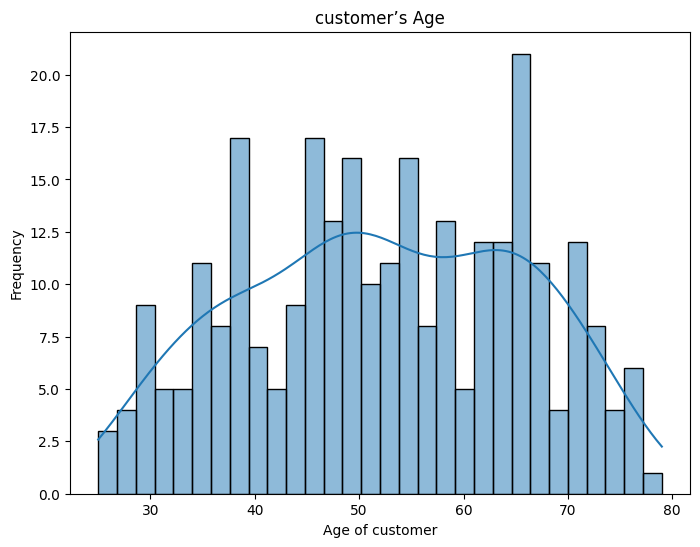

In [19]:
whales = food[food.Conditions == 'Whale']

plt.figure(figsize=(8, 6))
sns.histplot(data=whales, x='Age', bins=30, kde=True)
plt.title('customer’s Age')
plt.ylabel('Frequency')
plt.xlabel('Age of customer')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Household Income')

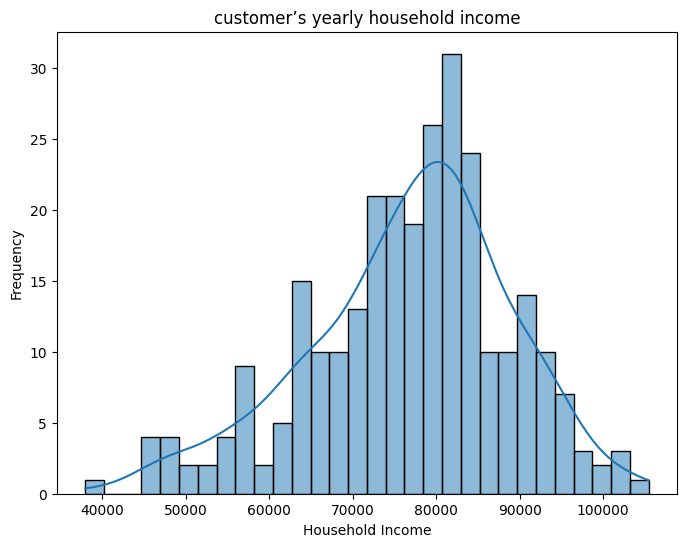

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data=whales, x='Income', bins=30, kde=True)
plt.title('customer’s yearly household income')
plt.ylabel('Frequency')
plt.xlabel('Household Income')